# Prediction using Unsupervised ML

## From the given ‘Iris’ dataset, predicting the optimum number of clusters and representing it visually.

The clustering algorithm going to be used in this notebook is **K-means Clustering algorithm**.

Kmeans clustering is used to partition data into K clusters in which observations belong to the cluster with closest centroid. The data points inside the similar cluster show lesser variations and more similarities and the data points belonging to different clusters show dissimilarites/variations. 

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting layout for seaborn plots
sns.set(rc={'figure.figsize':(15,10)})
sns.set(color_codes=True)

In [3]:
# kmeans clustering
from sklearn.cluster import KMeans

In [4]:
# loading the dataset
data = pd.read_csv('./data/Iris.csv')

In [5]:
# printing first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# a short info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# last 5 rows of the data
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Correlation matrix** - showing the relationship among the feature variables and the target variable( the class or the species of the plant).
>> the values range from -1 to 1 and we usually tend to look for those values which are behaving positively towards the target and which are not.

In [9]:
# correlation matrix 
corr = data.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


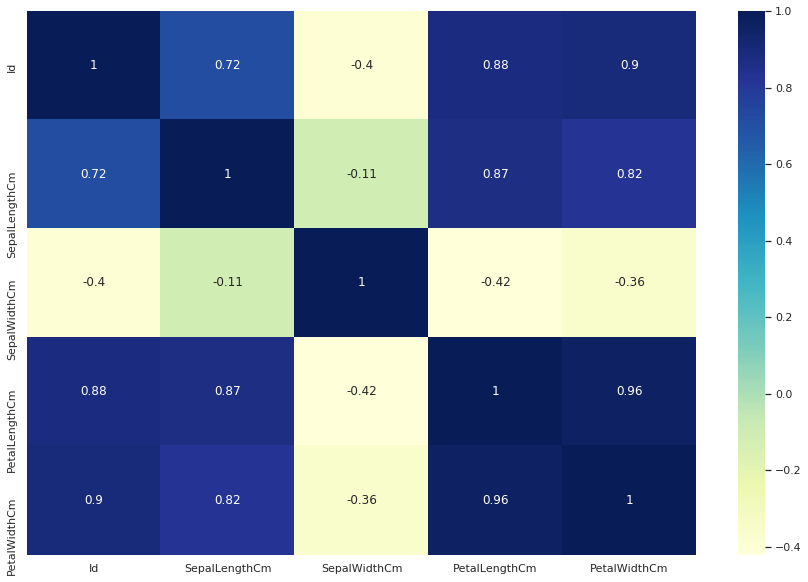

In [10]:
# plotting the heatmap of correlation matrix using seaborn
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

Correlation matrix makes things clear which are relevantly aligning to the target variable. The variables which are correlating positively with the target are PetalWidthCm, PetalLengthCm, SepalLengthCm, etc.

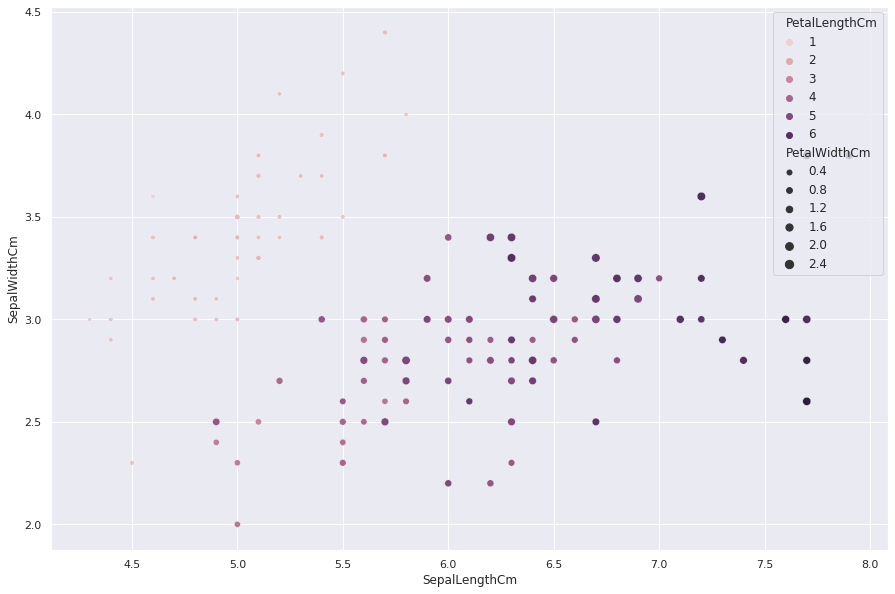

In [11]:
# observing the scattered data points
ax= sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', hue='PetalLengthCm',size='PetalWidthCm',data=data,s=70)
plt.show()

In [12]:
X = data.iloc[:,[0,1,2,3,4]].values


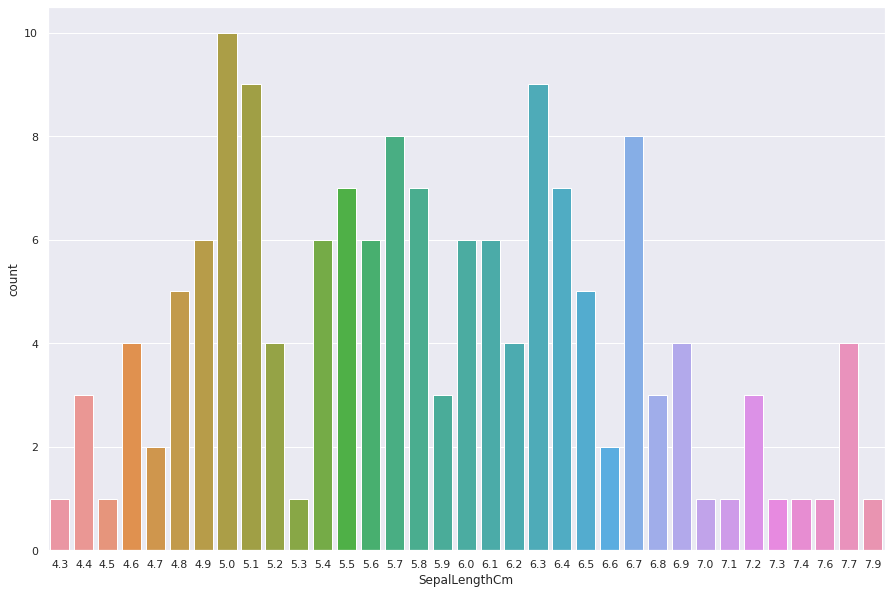

In [13]:
ax = sns.countplot(x='SepalLengthCm',data=data)
plt.show()

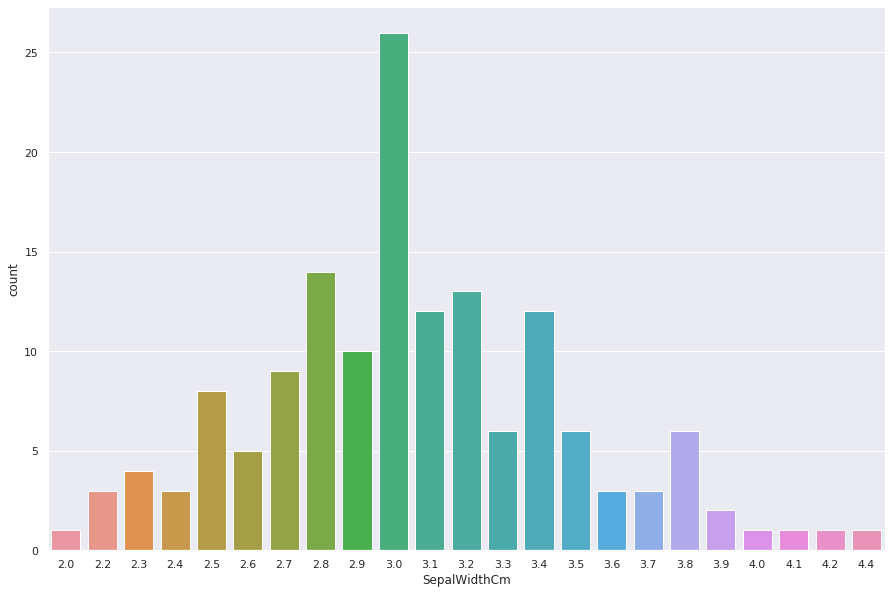

In [14]:
ax = sns.countplot(x='SepalWidthCm',data=data)
plt.show()

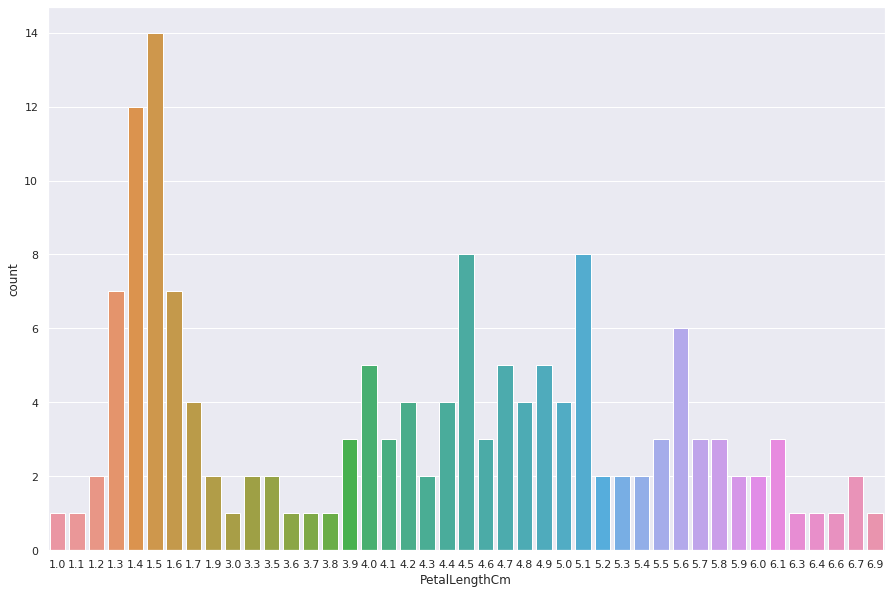

In [15]:
ax = sns.countplot(x='PetalLengthCm',data=data)
plt.show()

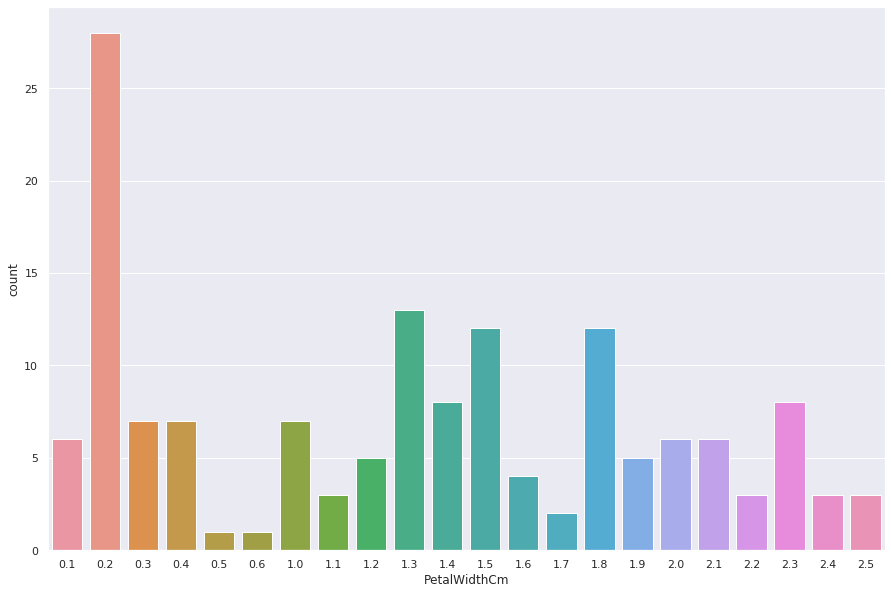

In [16]:
ax = sns.countplot(x='PetalWidthCm',data=data)
plt.show()

In [17]:
# initialising the K means with 3 clusters
kcl = KMeans(n_clusters=3)

In [18]:
predicted = kcl.fit_predict(data[['PetalLengthCm', 'PetalWidthCm']])

In [19]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
# adding one more column 'Cluster' to the original dataset
data['Cluster']=predicted

In [21]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [22]:
# cluster centroids
centroids = kcl.cluster_centers_

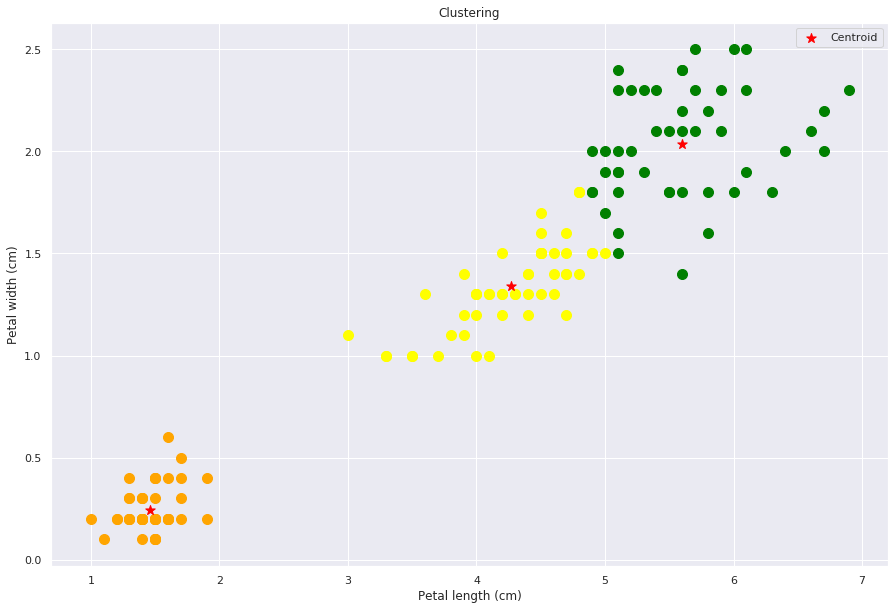

In [24]:
# plotting the clusters with their centroids to know them better
d1 = data[data.Cluster==0]
d2 = data[data.Cluster==1]
d3 = data[data.Cluster==2]
plt.scatter(d1['PetalLengthCm'], d1['PetalWidthCm'],color='green', s=100)
plt.scatter(d2['PetalLengthCm'], d2['PetalWidthCm'],color='orange',s=100)
plt.scatter(d3['PetalLengthCm'], d3['PetalWidthCm'],color='yellow',s=100)
plt.scatter(centroids[:,0], centroids[:,1], color='red', marker='*', label='Centroid', s=100)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Clustering')
plt.legend()

In [25]:
kcl.inertia_

31.38775897435898

In [26]:
err = []
for i in range(1,11):
    kcl = KMeans(n_clusters=i).fit(X)
    kcl.fit(X)
    err.append(kcl.inertia_)

The elbow method is used to determine the number of clusters inside the data from cluster analysis. The elbow of the plot indicates the number of clusters to use.

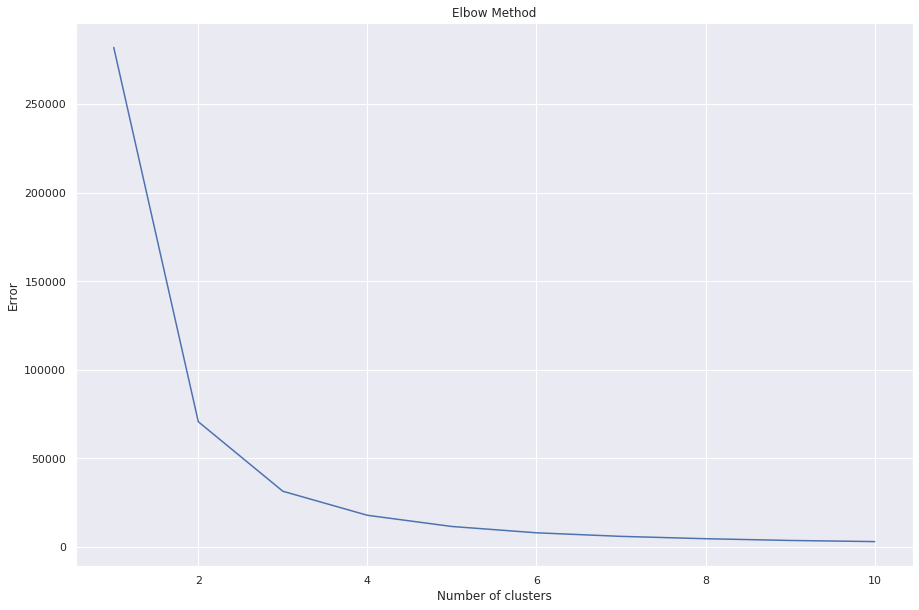

In [27]:
plt.plot(range(1,11),err)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.show()

Here, we can see that 3 clusters will be good to go for the cluster analysis as the elbow of the curve is tending at 3 which shows us that 3 clusters to use.

**Conclusion**: K-means clustering is used in unsupervised learning to learn about the data and find the similarities and the dissimilarities in the observations and group them accordingly using centroids as the core to place them in certain cluster.

**Thank You !**